<a href="https://colab.research.google.com/github/EmmaGiussani/Nuclear-Physics/blob/main/3_Parita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Potenziale centrale e Parità

# Potenziale armonico

Ricordiamo che nel caso di un potenziale armonico in una dimensione, cioè un potenziale del tipo


 <center> $V(x) = \frac{1}{2} ~ k ~ x^{2} $ </center>

le soluzioni dell'eq. di Schrodinger indipendente dal tempo

<center> $-\frac{\hbar^2}{2m}\frac{d\psi^2}{d^2x} + V(x) \psi(x) = E \psi(x) $ </center>

ci restituiscono i seguenti livelli energetici e funzioni d'onda:

| n             | E$_n$                             | $\psi_n(x)$ |
| :---          | :---:                             | :--- |
| 0 $ ~~~~ $    | $\frac{1}{2}\hbar\omega_0 ~~~~ $      | $\pi^{-1/4}e^{-\alpha^2 x^2 /2}$ |
| 1 $ ~~~~ $    | $\frac{3}{2}\hbar\omega_0 ~~~~ $      | $2^{-1/2}(2\alpha x)\pi^{-1/4}e^{-\alpha^2 x^2 /2}$ |
| 2 $ ~~~~ $    | $\frac{5}{2}\hbar\omega_0 ~~~~ $      | $2^{-3/2}(4\alpha^2 x^2 - 2)\pi^{-1/4}e^{-\alpha^2 x^2 /2}$ |
| 3 $ ~~~~ $    | $\frac{7}{2}\hbar\omega_0 ~~~~ $      | $3^{-1/2}(2\alpha^3 x^3 - 3\alpha x)\pi^{-1/4}e^{-\alpha^2 x^2 /2}$ |

dove

<center> $\alpha^2 = \frac{\sqrt{k \cdot m}}{\hbar}   ~~~~~~~~   \omega_0 = \sqrt{\frac{k}{m}}$ </center>

Vediamo come si comportano i primi livelli:


In [ ]:
import numpy as np
import plotly.graph_objects as go


# Definiamo le costanti
hbar = 6.6*np.power(10.,-16.)       # eV*s
c = 3*np.power(10.,8.)              # m/s

# Definiamo le grandezze. Consideriamo due casi: fisica atomica e fisica nucleare....
# Fisica atomica - ordini di grandezza
L = 5*np.power(10.,-11)             # [m]  - Raggio
m = 5*np.power(10.,5.)              # [eV]  - Massa elettrone
E_a = np.power(10.,3.)              # [eV]  - Energia tipica livelli atomici

# Fisica nucleare - ordini di grandezza
#L = 5*np.power(10.,-14)             # [m]  - Raggio
#m = np.power(10.,9.)                # [eV]  - Massa nucleoni
#E_a = np.power(10.,6.)              # [eV]  - Energia tipica livelli nucleari

# Creiamo alcuni vettori che ci serviranno dopo....
step = L*np.power(10.,-2)           # [m]  - Mi serve per creare vettore posizioni
N = 5                               # Numero di livelli energetici che vogliamo calcolare
x = np.arange(-L/2,L/2,step)
D = np.ones(len(x))
En = np.empty(N)
LEn = np.empty([N,len(x)])

# Calcoliamo un po' di grandezze....
k = m * 4 * np.power(E_a,2.) / np.power(hbar,2.)     # [eV*s^-2]
alpha = np.power(k*m,1/4)/np.power(hbar,1/2)         # [s^-2]
omega_0 = np.power(k/m,1/2)                          # [s^-1]
V = 1/2*k*np.power(x,2)/np.power(c,2)                # [eV]

# Calcoliamo i livelli energetici
for n in range(N):
    E = hbar * omega_0 * (n+0.5)
    En[n] = E
    LEn[n,:] = D*E

# Calcoliamo le funzioni d'onda
psi_0 = np.power(np.pi,-1/4)*np.exp(-np.power(alpha,2)*np.power(x,2)/(2*np.power(c,2)))
psi_1 = psi_0*np.power(2,-1/2)*(2*alpha*x/(np.power(c,1)))
psi_2 = psi_0*np.power(2,-3/2)*(4*np.power(alpha*x,2)/(np.power(c,2))-2)
psi_3 = psi_0*np.power(3,-1/2)*(2*np.power(alpha*x,3)/(np.power(c,3))-3*alpha*x/(np.power(c,1)))

# Facciamo il grafico
fig = go.Figure()
fig.add_trace(go.Scatter(x=x,y=V, name='Potenziale', line=dict(width=2)))
fig.add_trace(go.Scatter(x=x,y=LEn[0,:], name='E0', line=dict(color='crimson', width=1, dash='dash')))
fig.add_trace(go.Scatter(x=x,y=LEn[1,:], name='E1', line=dict(color='mediumspringgreen', width=1, dash='dash')))
fig.add_trace(go.Scatter(x=x,y=LEn[2,:], name='E2', line=dict(color='mediumslateblue', width=1, dash='dash')))
fig.add_trace(go.Scatter(x=x,y=LEn[3,:], name='E3', line=dict(color='orangered', width=1, dash='dash')))
# Per poter visualizzare sullo stesso grafico le funzioni d'onda e i livelli energetici moltiplico le funzioni d'onda per un coeff. pari all''energia del primo livello energetico
fig.add_trace(go.Scatter(x=x,y=En[0]*psi_0+En[0], name='$\psi_0$', line=dict(color='crimson', width=1)))
fig.add_trace(go.Scatter(x=x,y=En[0]*psi_1+En[1], name='$\psi_1$', line=dict(color='mediumspringgreen',width=1)))
fig.add_trace(go.Scatter(x=x,y=En[0]*psi_2+En[2], name='$\psi_2$', line=dict(color='mediumslateblue',width=1)))
fig.add_trace(go.Scatter(x=x,y=En[0]*psi_3+En[3], name='$\psi_3$', line=dict(color='orangered',width=1)))

fig.update_layout(
    xaxis_title="Distanza [m]",
    yaxis_title="Energia [eV]",
)

fig.update_yaxes(range=[0, 2*En[0]+En[3]])
fig.show()


## Parità

Vediamo cosa succede se applichiamo la parità. In una dimenione è semplice:
 <center> $ x \rightarrow -x  $ </center>

In [ ]:
#@title
x_p = -x

V = 1/2*k*np.power(x_p,2)/np.power(c,2)
psi_0_p = np.power(np.pi,-1/4)*np.exp(-np.power(alpha,2)*np.power(x_p,2)/(2*np.power(c,2)))
psi_1_p = psi_0*np.power(2,-1/2)*(2*alpha*x_p/(np.power(c,1)))
psi_2_p = psi_0*np.power(2,-3/2)*(4*np.power(alpha*x_p,2)/(np.power(c,2))-2)
psi_3_p = psi_0*np.power(3,-1/2)*(2*np.power(alpha*x_p,3)/(np.power(c,3))-3*alpha*x_p/(np.power(c,1)))

# Aggiungiamo queste curve al grafico
fig.add_trace(go.Scatter(x=x,y=En[0]*psi_0_p+En[0], name='$\psi_{0P}$', line=dict(color='crimson', width=1, dash='dot')))
fig.add_trace(go.Scatter(x=x,y=En[0]*psi_1_p+En[1], name='$\psi_{1P}$', line=dict(color='mediumspringgreen',width=1, dash='dot')))
fig.add_trace(go.Scatter(x=x,y=En[0]*psi_2_p+En[2], name='$\psi_{2P}$', line=dict(color='mediumslateblue',width=1, dash='dot')))
fig.add_trace(go.Scatter(x=x,y=En[0]*psi_3_p+En[3], name='$\psi_{3P}$', line=dict(color='orangered',width=1, dash='dot')))
fig.show()

## Densità di probabilità - $\psi^2$

Le corrispondendi densità di probabilità risultano quindi essere:

In [ ]:
#@title
figP = go.Figure()
figP.add_trace(go.Scatter(x=x,y=V, name='Potenziale', line=dict(width=2)))
figP.add_trace(go.Scatter(x=x,y=LEn[0,:], name='E0', line=dict(color='crimson', width=1, dash='dash')))
figP.add_trace(go.Scatter(x=x,y=LEn[1,:], name='E1', line=dict(color='mediumspringgreen', width=1, dash='dash')))
figP.add_trace(go.Scatter(x=x,y=LEn[2,:], name='E2', line=dict(color='mediumslateblue', width=1, dash='dash')))
figP.add_trace(go.Scatter(x=x,y=LEn[3,:], name='E3', line=dict(color='orangered', width=1, dash='dash')))
# Per poter visualizzare sullo stesso grafico le funzioni d'onda e i livelli energetici moltiplico le funzioni d'onda per un coeff. pari all''energia del primo livello energetico
figP.add_trace(go.Scatter(x=x,y=En[0]*np.power(psi_0,2)+En[0], name='$\psi_0^2$', line=dict(color='crimson', width=1)))
figP.add_trace(go.Scatter(x=x,y=En[0]*np.power(psi_1,2)+En[1], name='$\psi_1^2$', line=dict(color='mediumspringgreen',width=1)))
figP.add_trace(go.Scatter(x=x,y=En[0]*np.power(psi_2,2)+En[2], name='$\psi_2^2$', line=dict(color='mediumslateblue',width=1)))
figP.add_trace(go.Scatter(x=x,y=En[0]*np.power(psi_3,2)+En[3], name='$\psi_3^2$', line=dict(color='orangered',width=1)))

figP.update_layout(
    xaxis_title="Distanza [m]",
    yaxis_title="Energia [eV]",
)

figP.update_yaxes(range=[0, 2*En[0]+En[3]])
figP.show()


Se ora applichiamo la parità...

In [ ]:
# Aggiungiamo queste curve al grafico
figP.add_trace(go.Scatter(x=x,y=En[0]*np.power(psi_0_p,2)+En[0], name='$\psi_{0P}^2$', line=dict(color='crimson', width=1, dash='dot')))
figP.add_trace(go.Scatter(x=x,y=En[0]*np.power(psi_1_p,2)+En[1], name='$\psi_{1P}^2$', line=dict(color='mediumspringgreen',width=1, dash='dot')))
figP.add_trace(go.Scatter(x=x,y=En[0]*np.power(psi_2_p,2)+En[2], name='$\psi_{2P}^2$', line=dict(color='mediumslateblue',width=1, dash='dot')))
figP.add_trace(go.Scatter(x=x,y=En[0]*np.power(psi_3_p,2)+En[3], name='$\psi_{3P}^2$', line=dict(color='orangered',width=1, dash='dot')))
figP.show()

Quindi, sia per le funzioni pari $\psi(-x) = + \psi(x)$ (come $\psi_0$ e $\psi_2$) che per le funzioni dispari $\psi(-x) = - \psi(x)$ (come $\psi_1$ e $\psi_3$), si ha che la densità di probabilità rimande invariata...

----------------------------------------------------------------


# Oscillatore armonico semplice - 3D

In questo caso il potenziale è naturalmente analogo ma la dipendenza è da r e non più da x:

 <center> $V(r) = \frac{1}{2} ~ k ~ r^{2} $ </center>

Il passaggio in 3D complica un po' le cose....
Ricordiamo che la soluzione dell'eq. di Schordinger, nel caso di un potenziale centrale, può essere suddivisa in una componente radiale, che dipende quindi solamente dalla distanza dal centro, e una componente angolare:

 <center> $\psi(r,\theta,\phi) = R(r) \Theta(\theta) \Phi(\phi) = R(r) Y_{l m_l}(\theta,\phi)$ </center>

Trattiamo quindi separatamente la parte angolare e la parte radiale. Teniamo presente però che per quanto rigaurda la parità ciò che ci interessa è naturalmente la parte angolare e non quella radiale.

## Componente angolare - $Y_{l m_l}(\theta,\phi)$

Iniziamo guardando la parte che ci interessa maggiormente per quanto riguarda la parità e cioè la dipendenza da $\theta$ e $\phi$

| l             | m$_l$                             | $Y_{l m_l}(\theta,\phi)$ |
| :---          | :---:                             | :--- |
| 0 $ ~~~~ $    | $ 0 ~~~~ $                        | $(1/4\pi)^{-1/2}$ |
| 1 $ ~~~~ $    | $ 0 ~~~~ $                        | $(3/4\pi)^{-1/2}cos\theta$ |
| 1 $ ~~~~ $    | $ \pm 1 ~~~~ $                    | $\mp(3/8\pi)^{-1/2}sin\theta e^{\pm i \phi}$ |
| 2 $ ~~~~ $    | $ 0 ~~~~ $                        | $(5/16\pi)^{-1/2}(3cos^2\theta-1)$ |
| 2 $ ~~~~ $    | $ \pm 1 ~~~~ $                    | $\pm(15/8\pi)^{-1/2}sin\theta~ cos\theta e^{\pm i \phi}$ |
| 2 $ ~~~~ $    | $ \pm 2 ~~~~ $                    | $(15/32\pi)^{-1/2}sin^2\theta~ e^{\pm 2i \phi}$ |

Ricordiamo inoltre che ***le armoniche sferiche ci restituiscono la parte angolare della soluzione all'equazione di Schrödinger PER QUALSIASI POTENZIALE CENTRALE.***

Si può cercare di visualizzare le distribuzioni di probabilità spaziale $ |Y_{l m_l}(\theta,\phi)|^2 $ ruotando ognuna delle seguenti figure attorno all'asse z

![Armoniche2D](Armoniche.png)
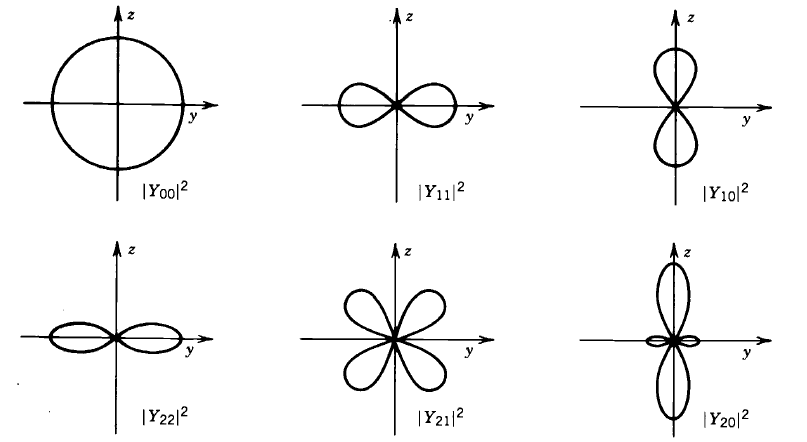

Non è però sempre semplice 'immaginarsi' queste funzioni e la loro parità. Proviamo quindi a visualizzarle in 3D


In [ ]:
import scipy.special as sp
import numpy as np
import plotly.graph_objects as go

# Scegliamo valori di l e m_l
l = 2
m = 0

Nu = 100
theta =  np.linspace(0, np.pi, Nu)     # Creiamo un vettore contenente Nu valori di theta tra 0 e pi.greco
phi = np.linspace(0, 2*np.pi, Nu)            # Creiamo un vettore contenente Nu valori di phu tra 0 e 2*pi.greco
THETA, PHI = np.meshgrid(theta, phi)       # Creiamo una griglia contenente tutte le combinazioni di theta e phi

#PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]

# Utilizziamo sph_harm per farci restituire le armoniche sferiche Ylm per determinati l e m
# Teniamo presente che sph_harm restituisce complex float e quindi prendiamo abs
R = np.abs(sp.sph_harm(m, l, PHI, THETA))

#Convertiamo in coordinate cartesiane per la rappresentazione 3D
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

In [ ]:
fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z, surfacecolor=X**2 + Y**2 + Z**2)])    # Coloro la superficie in funzione della distanza dal centro

print('l=',l)
print('m=',m)

fig.update_layout(title='Armoniche sferiche', autosize=False, width=500, height=500)
fig.show()

l= 2
m= 0


Ricordiamo ora che applicando l'operatore parità in coordinate sferiche avremo che

 <center> $ r \rightarrow r,  ~~ \theta \rightarrow \pi-\theta,
  \phi \rightarrow \phi + \pi  $ </center>

  Risulta quindi evidente che $ |Y_{l m_l}(\theta,\phi)|^2 $ rimane invariata per parità. Se consideriamo invece le armoniche sferiche avremo, in analogia a quanto visto nel caso unidimensionale, che

<center> $Y_{l m_l}(\pi - \theta, \phi + \pi) = (-1)^l ~ Y_{l m_l}(\theta, \phi) $ </center>

## Componente radiale - R(r)

Per determinare la densità di probabilità radiale, e cioè la probabilità di trovare la particella tra *r* e *r+dr* mediata su tutti gli angoli, dobbiamo integrare la densità di probabilità in $\theta$ e $\phi$. Dato che le armoniche sferiche $Y_{lm_l}$ sono normalizzate si ottiene che

<center> $P(r) = r^2 |R(r)|^2$ </center>

In modo analogo al caso unidimensionale (oscillatore armonico) abbiamo che:

| n             | l               | E$_n$                                | $R(r)$ |
| :---          | :---:           | :---:                                | :--- |
| 0 $ ~~~~ $    | 0 $ ~~~~ $      |$\frac{3}{2}\hbar\omega_0 ~~~~ $      | $(2\alpha^{3/2}/\pi^{1/4})e^{-\alpha^2 r^2 /2}$ |
| 1 $ ~~~~ $    | 1 $ ~~~~ $      |$\frac{5}{2}\hbar\omega_0 ~~~~ $      | $(2\alpha^{3/2}\sqrt{2}/\sqrt{3}\pi^{1/4})(\alpha r)e^{-\alpha^2 r^2 /2}$ |
| 2 $ ~~~~ $    | 0 $ ~~~~ $      |$\frac{7}{2}\hbar\omega_0 ~~~~ $      | $(2\alpha^{3/2}\sqrt{2}/\sqrt{3}\pi^{1/4})(3/2-\alpha^2 r^2)e^{-\alpha^2 r^2 /2}$ |
| 2 $ ~~~~ $    | 2 $ ~~~~ $      |$\frac{7}{2}\hbar\omega_0 ~~~~ $      | $(4\alpha^{3/2}/\sqrt{15}\pi^{1/4})(\alpha^2 r^2)e^{-\alpha^2 r^2 /2}$ |

E' da notare che anche in questo caso l'andamento radiale è analogo a quello unidimensionale: si hanno delle oscillazioni nella regione permessa classicamente e un decadimento esponenziale nella regione 'proibita'.
Nel caso 3D si ha che i livelli energetici risultano essere

<center> $E_n = \hbar \omega_0 (n+\frac{3}{2})$ </center>

mentre le densità di probabilità radiali risultano essere:

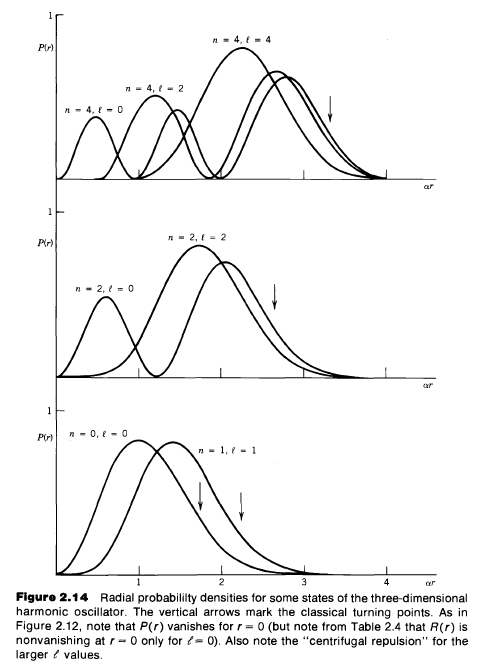

Un paio di considerazioni finali:


*   Per quanto riguarda la parità ricordiamo che in coordinate sferiche <center> $ r ~~ \rightarrow r$ </center> quindi la componente radiale non viene modificata dalla parità!

*   I livelli energetici sono **degeneri in $m_l$** e quindi con degenerazione pari a (2l+1).

# Potenziale Coulombiano

Consideriamo ora invece un potenziale coulombiano

<center> $ V(r) = -\frac{Ze^2}{4 \pi \epsilon_0 r}$ </center>

Dato che anche in questo caso abbiamo un potenziale centrale tutto il discorso fatto sulla dipendenza angolare e quindi sulle armoniche sferiche rimane invariato. Quello che cambia è la dipendenza radiale

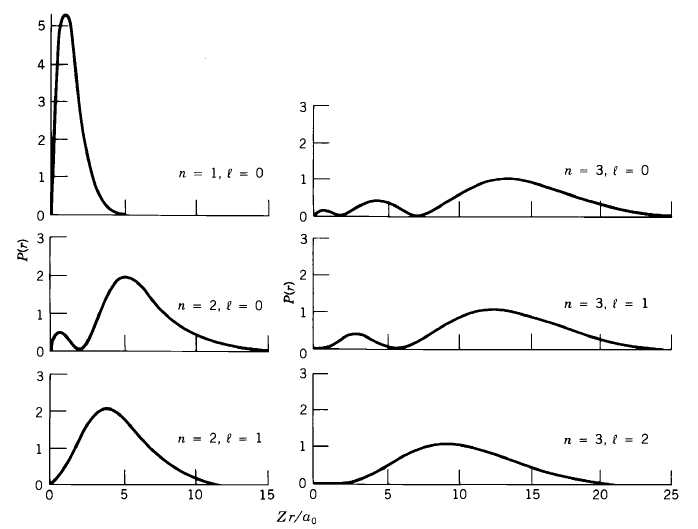


Di seguito una rappresentazione di quello che si ottiene unendo la parte radiale a quella angolare (armoniche sferiche)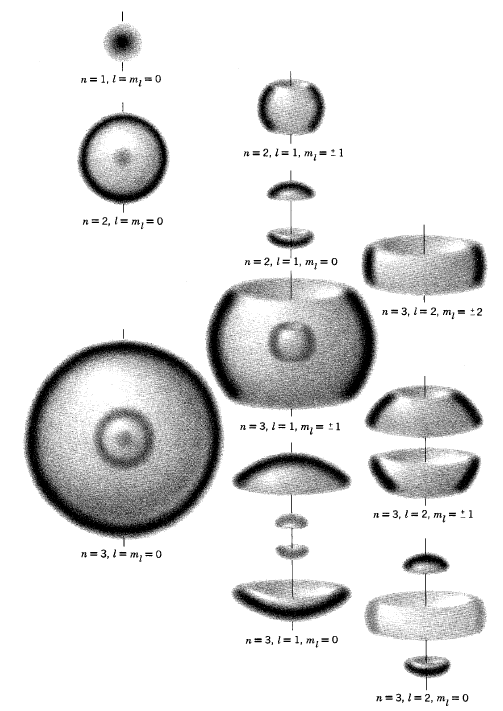
